In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
# Remove first and  end spaces
def remove_first_end_spaces(string):
    return "".join(string.rstrip().lstrip())

def remove_after_paranthesis(a_string):
    split_string = a_string.split(" (", 1)
    return split_string[0]

In [3]:
rebgov = pd.read_csv('KarenAlbert_qsi_publicuse_2020v1.csv')
rebgov.head()

,old_id,Year,SideA,SideB,actorid,DyadID,VDemID,CCD,Count,ConflictID,...,PeaceA,Gov_in_Exile,LocalGov,NationalGov,PaperNatGov,Gov_Other,TotRebGov,SideB.1,SideA.1,Year.1
0,1002.0,1945,China,PLA,161.0,466,110,710,5,3,...,NaN,0.0,0.0,1.0,0,0,8,PLA,China,1945
1,1002.0,1946,China,PLA,161.0,466,110,710,5,3,...,NaN,0.0,0.0,1.0,0,0,15,PLA,China,1946
2,1002.0,1947,China,PLA,161.0,466,110,710,5,3,...,NaN,0.0,0.0,1.0,0,0,11,PLA,China,1947
3,1002.0,1948,China,PLA,161.0,466,110,710,5,3,...,NaN,0.0,0.0,1.0,0,0,11,PLA,China,1948
4,1002.0,1949,China,PLA,161.0,466,110,710,5,3,...,0.0,0.0,0.0,0.0,0,0,0,PLA,China,1949


In [4]:
rebgov.columns

Index(['old_id', 'Year', 'SideA', 'SideB', 'actorid', 'DyadID', 'VDemID',
       'CCD', 'Count', 'ConflictID', 'Ep', 'Location', 'ArmedConflict',
       'Existence', 'In_Power', 'Flag', 'OrgGov', 'Elect', 'Gov', 'Border',
       'ID', 'PoliticalParty', 'AttemptIO', 'JoinIO', 'Embassy', 'Media',
       'Constitution', 'Pol_Other', 'Currency', 'NegResource', 'Econ_Treaty',
       'Taxation', 'Econ_Other', 'Education', 'Health', 'Infrastructure',
       'Transportation', 'Law', 'Policing', 'Justice', 'Housing',
       'ConstituencyPolitics', 'Aid', 'Soc_Other', 'ArmedForces', 'Mil_Other',
       'IllegalNet', 'territorial', 'Incomp', 'Terr',
       'YEAR.First.Ep.Ended..final.', 'Years.of.Civil.War',
       'Outcome.of.Civil.War', 'VicSide', 'PeaceA', 'Gov_in_Exile', 'LocalGov',
       'NationalGov', 'PaperNatGov', 'Gov_Other', 'TotRebGov', 'SideB.1',
       'SideA.1', 'Year.1'],
      dtype='object')

In [4]:
print(len(rebgov))
print(len(rebgov.DyadID.unique()))

4566
234


In [124]:
rebgov = rebgov[rebgov.Year >= 1989].reset_index()

In [154]:
print(len(rebgov))
print(len(rebgov.DyadID.unique()))

4566
234


In [5]:
rebgov.SideB = rebgov.SideB.apply(remove_first_end_spaces)

In [6]:
rebgov.SideB.replace({'Croatian Republic of Bosnia and Herzegovina':'Croatian Republic of Bosnia and Hercegovina',
                      'NSCN (I-M)':'NSCN - IM',
                      'RCD-ML':'RCD - ML',
                      'Hezb-i-Wahdat': 'Hizb-i Wahdat',
                      'Kashmir insurgents':'Kashmir Insurgents',
                      'PKK/KADEK/KONGRA-GEL':'PKK/Kadek/KONGRA-GEL',
                      'Jumbish-i-Milli-ye-Islami':'Junbish-i Milli-yi Islami',
                      'Gods Army':"God's Army",
                      'Serbian Republic of Bosnia and Hercegovina':'Serbian Republic of Bosnia and Herzegovina'}, inplace=True)

In [7]:
rebgov.SideA = rebgov.SideA.str.lower()
rebgov.SideB = rebgov.SideB.str.lower()
rebgov['SideA.1'] = rebgov['SideA.1'].str.lower()
rebgov['SideB.1'] = rebgov['SideB.1'].str.lower()

In [8]:
rebgov.rename(columns={'SideA': 'CName', 'SideB':'RebName'}, inplace=True)

In [34]:
rebgov.head()

,old_id,Year,CName,RebName,actorid,DyadID,VDemID,CCD,Count,ConflictID,...,PeaceA,Gov_in_Exile,LocalGov,NationalGov,PaperNatGov,Gov_Other,TotRebGov,SideB.1,SideA.1,Year.1
0,1002.0,1945,china,pla,161.0,466,110,710,5,3,...,NaN,0.0,0.0,1.0,0,0,8,pla,china,1945
1,1002.0,1946,china,pla,161.0,466,110,710,5,3,...,NaN,0.0,0.0,1.0,0,0,15,pla,china,1946
2,1002.0,1947,china,pla,161.0,466,110,710,5,3,...,NaN,0.0,0.0,1.0,0,0,11,pla,china,1947
3,1002.0,1948,china,pla,161.0,466,110,710,5,3,...,NaN,0.0,0.0,1.0,0,0,11,pla,china,1948
4,1002.0,1949,china,pla,161.0,466,110,710,5,3,...,0.0,0.0,0.0,0.0,0,0,0,pla,china,1949


In [39]:
len(rebgov)

4566

In [38]:
cons_df

old_id  RebName  actorid  DyadID  VDemID  CCD  Count  \
Year CName                                                                  
1945 bolivia              1        1        1       1       1    1      1   
     china                2        2        2       2       2    2      2   
     greece               1        1        1       1       1    1      1   
     iran                 2        2        2       2       2    2      2   
     philippines          1        1        1       1       1    1      1   
...                     ...      ...      ...     ...     ...  ...    ...   
2012 tajikistan           1        1        1       1       1    1      1   
     thailand             1        1        1       1       1    1      1   
     turkey               1        1        1       1       1    1      1   
     uganda               2        2        2       2       2    2      2   
     united kingdom       1        1        1       1       1    1      1   

                     ConflictID  Ep  Location  ...  PeaceA  Gov_in_Exile  \
Year CName                                     ...                         
1945 bolivia                  1   1         1  ...       0             1   
     china                    2   2         2  ...       0             2   
     greece                   1   1         1  ...       0             1   
     iran                     2   2         2  ...       0             2   
     philippines              1   1         1  ...       0             1   
...                         ...  ..       ...  ...     ...           ...   
2012 tajikistan               1   1         1  ...       1             1   
     thailand                 1   1         1  ...       0             1   
     turkey                   1   1         1  ...       0             1   
     uganda                   2   2         2  ...       2             2   
     united kingdom           1   1         1  ...       1             1   

                     LocalGov  NationalGov  PaperNatGov  Gov_Other  TotRebGov  \
Year CName                                                                      
1945 bolivia                1            1            1          1          1   
     china                  2            2            2          2          2   
     greece                 1            1            1          1          1   
     iran                   2            2            2          2          2   
     philippines            1            1            1          1          1   
...                       ...          ...          ...        ...        ...   
2012 tajikistan             1            1            1          1          1   
     thailand               1            1            1          1          1   
     turkey                 1            1            1          1          1   
     uganda                 2            2            2          2          2   
     united kingdom         1            1            1          1          1   

                     SideB.1  SideA.1  Year.1  
Year CName                                     
1945 bolivia               1        1       1  
     china                 2        2       2  
     greece                1        1       1  
     iran                  2        2       2  
     philippines           1        1       1  
...                      ...      ...     ...  
2012 tajikistan            1        1       1  
     thailand              1        1       1  
     turkey                1        1       1  
     uganda                2        2       2  
     united kingdom        1        1       1  

[2091 rows x 62 columns]

In [42]:
rebgov_droped_dups = rebgov.drop_duplicates(subset=['Year', 'CName'], keep=False).reset_index(drop=True)
rebgov_droped_dups

,old_id,Year,CName,RebName,actorid,DyadID,VDemID,CCD,Count,ConflictID,...,PeaceA,Gov_in_Exile,LocalGov,NationalGov,PaperNatGov,Gov_Other,TotRebGov,SideB.1,SideA.1,Year.1
0,1003.0,1945,greece,dse,162.0,467,164,350,6,4,...,NaN,0.0,0.0,0.0,0,0,2,dse,greece,1945
1,1003.0,1946,greece,dse,162.0,467,164,350,6,4,...,0.0,0.0,0.0,0.0,0,0,4,dse,greece,1946
2,1003.0,1947,greece,dse,162.0,467,164,350,6,4,...,0.0,0.0,0.0,1.0,0,0,6,dse,greece,1947
3,1003.0,1948,greece,dse,162.0,467,164,350,6,4,...,0.0,0.0,0.0,1.0,0,0,3,dse,greece,1948
4,1003.0,1949,greece,dse,162.0,467,164,350,6,4,...,0.0,0.0,0.0,1.0,0,0,2,dse,greece,1949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,2013.0,2008,rwanda,fdlr,1128.0,128,129,517,555,179,...,0.0,0.0,0.0,0.0,0,0,3,fdlr,rwanda,2008
1146,2013.0,2009,rwanda,fdlr,1128.0,128,129,517,555,179,...,0.0,0.0,0.0,0.0,0,0,2,fdlr,rwanda,2009
1147,2013.0,2010,rwanda,fdlr,1128.0,128,129,517,555,179,...,0.0,0.0,0.0,0.0,0,0,2,fdlr,rwanda,2010
1148,2013.0,2011,rwanda,fdlr,1128.0,128,129,517,555,179,...,0.0,0.0,0.0,0.0,0,0,2,fdlr,rwanda,2011


In [37]:
cons_df = rebgov.groupby(by=['Year', 'CName']).count()
# cons_df[cons_df.CName >1]

In [33]:
cons_df

Year  CName         
1945  bolivia           1
      china             2
      greece            1
      iran              2
      philippines       1
                       ..
2012  tajikistan        1
      thailand          1
      turkey            1
      uganda            2
      united kingdom    1
Name: RebName, Length: 2091, dtype: int64

In [131]:
# rebgov.info()

In [132]:
powshare = pd.read_excel('WhoBringsWhichPeace.FinalVersion.xls')
powshare.head()

,statenum,CName,IncompID,RebName,DyadID,Year,MED,MEDNAME,BIASMED,Name:Client,...,TOPAD-PA,Year of PA,Name of PA,DWALMILPACT,DWALTERRPACT,DWALPOLPACT,DAMNESTY,DREPAT,Guarantees,rebstrengthUCDP
0,700,Afghanistan,1,Hezb-i-Islami,1,1989,0,NaN,0,NaN,...,0,NaT,NaN,0,0,0,0,0.0,0.0,-1.145132
1,700,Afghanistan,1,Hezb-i-Islami,1,1990,0,NaN,0,NaN,...,0,NaT,NaN,0,0,0,0,0.0,0.0,-0.253781
2,700,Afghanistan,1,Hezb-i-Islami,1,1991,1,"Iran, Pakistan, Soviet, Switzerland",1,Soviet:Gov; Pakistan:Hezb-i-islami,...,0,NaT,NaN,0,0,0,0,0.0,0.0,0.000000
3,700,Afghanistan,1,Hezb-i-Islami,1,1992,1,"Pakistan, UN",1,Pakistan:Hezb-i-islami,...,0,NaT,NaN,0,0,0,0,0.0,0.0,0.000000
4,700,Afghanistan,1,Hezb-i-Islami,1,1993,1,"Pakistan, Iran, Saudiarabia",1,"Pakistan, Saudi Arabia: Hezb-i-Islami",...,1,NaT,Compiled Agreements,0,0,1,3,1.0,1.0,0.105360


In [18]:
print(len(powshare))
print(len(powshare.DyadID.unique()))

1392
202


In [19]:
powshare = powshare[powshare.Year >= 1989].reset_index()

In [21]:
powshare.RebName = powshare.RebName.apply(remove_first_end_spaces)
powshare.CName = powshare.CName.apply(remove_after_paranthesis)

In [22]:
powshare.CName = powshare.CName.str.lower()
powshare.RebName = powshare.RebName.str.lower()

In [23]:
# for group in powshare.RebName.unique():
#     if len(set(powshare[powshare.RebName == group].CName))>1:
#         print(group,"===" ,set(powshare[powshare.RebName == group].CName))

In [24]:
# powshare.info()

In [27]:
mergeddf = pd.merge(rebgov, powshare, on=["CName", "RebName", "Year"])

In [30]:
mergeddf.DyadID_y

0      98
1      98
2      98
3      98
4      98
       ..
593    87
594    87
595    87
596    87
597    87
Name: DyadID_y, Length: 598, dtype: int64

In [29]:
list(mergeddf.columns)

['index_x',
 'old_id',
 'Year',
 'CName',
 'RebName',
 'actorid',
 'DyadID_x',
 'VDemID',
 'CCD',
 'Count',
 'ConflictID',
 'Ep',
 'Location',
 'ArmedConflict',
 'Existence',
 'In_Power',
 'Flag',
 'OrgGov',
 'Elect',
 'Gov',
 'Border',
 'ID',
 'PoliticalParty',
 'AttemptIO',
 'JoinIO',
 'Embassy',
 'Media',
 'Constitution',
 'Pol_Other',
 'Currency',
 'NegResource',
 'Econ_Treaty',
 'Taxation',
 'Econ_Other',
 'Education',
 'Health',
 'Infrastructure',
 'Transportation',
 'Law',
 'Policing',
 'Justice',
 'Housing',
 'ConstituencyPolitics',
 'Aid',
 'Soc_Other',
 'ArmedForces',
 'Mil_Other',
 'IllegalNet',
 'territorial',
 'Incomp',
 'Terr_x',
 'YEAR.First.Ep.Ended..final.',
 'Years.of.Civil.War',
 'Outcome.of.Civil.War',
 'VicSide',
 'PeaceA',
 'Gov_in_Exile',
 'LocalGov',
 'NationalGov',
 'PaperNatGov',
 'Gov_Other',
 'TotRebGov',
 'SideB.1',
 'SideA.1',
 'Year.1',
 'index_y',
 'statenum',
 'IncompID',
 'DyadID_y',
 'MED',
 'MEDNAME',
 'BIASMED',
 'Name:Client',
 'BIASGOV',
 'BIASREB

In [136]:
from collections import defaultdict

In [137]:
rebelgroups_full_match = []
for rebgroup in rebgovgroups:
    for rebgroup2 in powsharegroups:
        if rebgroup == rebgroup2:
            rebelgroups_full_match.append(rebgroup2)
print("# Matched:", len(rebelgroups_full_match))

# Matched: 89


In [138]:
diff_named = set(rebgovgroups) - set(rebelgroups_full_match)
print(len(diff_named))

78


In [139]:
unmatched_powshare = set(powsharegroups) - set(rebelgroups_full_match)
unmatched_rebgov = set(rebgovgroups) - set(rebelgroups_full_match)

In [140]:
from difflib import SequenceMatcher
from Levenshtein import distance
import numpy as np

In [141]:
matched_groups = []
countries = []
for group1 in unmatched_rebgov:
    for group2 in unmatched_powshare:
        matched_ratio = SequenceMatcher(None, group1, group2).ratio()
#         country1 = set(rebgov[rebgov.SideB == group].SideA)
#         country2 = set(powshare[powshare.RebName == group].CName)
#         country_match = SequenceMatcher(None, country1, country2).ratio()
        
        if (matched_ratio >= 0.65):
            matched_groups.append((group1, group2))
#             countries.append((country1, country2))

In [142]:
matched_groups

[('pira', 'palir'),
 ('pira', 'ira'),
 ('republic of south moluccas', 'republic of south ossetia'),
 ('republic of south moluccas', 'republic of slovenia'),
 ('military faction (forces of raol cedras)', 'military faction (lesotho)'),
 ('cpn-m', 'cpn-m/upf'),
 ('serbian republic of bosnia and herzegovina',
  'serbian republic of bosnia and hercegovina'),
 ('nscn - im', 'nscn (i-m)'),
 ('rcd - ml', 'rcd-ml'),
 ('fdlr', 'fdr'),
 ('kcp', 'cpp'),
 ('fn', 'fdn'),
 ('fn', 'fnt'),
 ('bla', 'bma'),
 ('splm/a', 'splm/a (nda)'),
 ('splm/a', 'slm'),
 ('ansar al-islam', 'al-itahad al-islami'),
 ('pmr', 'epr'),
 ('pcjss/sb', 'jss/sb'),
 ('lra', 'lrm'),
 ('lra', 'ira'),
 ('junbish-i milli-yi islami', 'jumbish-i-milli-ye-islami'),
 ("god's army", 'gods army'),
 ('sura', 'ufra'),
 ('republic of biafra', 'republic of south ossetia'),
 ('republic of biafra', 'republic of slovenia'),
 ('elf', 'alf'),
 ('cpb', 'cpp'),
 ('cpt', 'cpp'),
 ('mta', 'bma'),
 ('mta', 'eta'),
 ('mta', 'mtra'),
 ('mta', 'mpa'),
 ('

In [143]:
mergeddf

,index_x,old_id,Year,CName,RebName,actorid,DyadID_x,VDemID,CCD,Count,...,TOPAD-PA,Year of PA,Name of PA,DWALMILPACT,DWALTERRPACT,DWALPOLPACT,DAMNESTY,DREPAT,Guarantees,rebstrengthUCDP
0,56,1005.0,1990,iran,kdpi,164.0,260,79,630,8,...,0,NaT,NaN,0,0,0,0,0.0,0.0,-3.735399
1,57,1005.0,1991,iran,kdpi,164.0,260,79,630,8,...,0,NaT,NaN,0,0,0,0,0.0,0.0,NaN
2,58,1005.0,1992,iran,kdpi,164.0,260,79,630,8,...,0,NaT,NaN,0,0,0,0,0.0,0.0,NaN
3,59,1005.0,1993,iran,kdpi,164.0,260,79,630,8,...,0,NaT,NaN,0,0,0,0,0.0,0.0,-3.917721
4,60,1005.0,1994,iran,kdpi,164.0,260,79,630,8,...,0,NaT,NaN,0,0,0,0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,4489,1678.0,1999,india,kashmir insurgents,817.0,355,39,750,539,...,0,NaT,NaN,0,0,0,0,0.0,0.0,-5.917356
594,4490,1678.0,2000,india,kashmir insurgents,817.0,355,39,750,539,...,0,NaT,NaN,0,0,0,0,0.0,0.0,-5.725506
595,4491,1678.0,2001,india,kashmir insurgents,817.0,355,39,750,539,...,0,NaT,NaN,0,0,0,0,0.0,0.0,-5.723201
596,4492,1678.0,2002,india,kashmir insurgents,817.0,355,39,750,539,...,0,NaT,NaN,0,0,0,0,0.0,0.0,-5.694326


In [162]:
cleaned_data = mergeddf[mergeddf.RebName.isin(rebelgroups_full_match)]
clean_no_nan_data = cleaned_data.dropna(subset=['rebstrengthUCDP'])
clean_no_nan_data.rename(columns={'DyadID_x':'DyadID'}, inplace=True)
clean_no_nan_data

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4449: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,index_x,old_id,Year,CName,RebName,actorid,DyadID,VDemID,CCD,Count,...,TOPAD-PA,Year of PA,Name of PA,DWALMILPACT,DWALTERRPACT,DWALPOLPACT,DAMNESTY,DREPAT,Guarantees,rebstrengthUCDP
0,56,1005.0,1990,iran,kdpi,164.0,260,79,630,8,...,0,NaT,NaN,0,0,0,0,0.0,0.0,-3.735399
3,59,1005.0,1993,iran,kdpi,164.0,260,79,630,8,...,0,NaT,NaN,0,0,0,0,0.0,0.0,-3.917721
6,62,1005.0,1996,iran,kdpi,164.0,260,79,630,8,...,0,NaT,NaN,0,0,0,0,0.0,0.0,-4.051785
14,241,1021.0,1989,myanmar,knu,180.0,306,10,775,44,...,0,NaT,NaN,0,0,0,0,0.0,0.0,-3.593569
15,242,1021.0,1990,myanmar,knu,180.0,306,10,775,44,...,0,NaT,NaN,0,0,0,0,0.0,0.0,-3.646320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,4489,1678.0,1999,india,kashmir insurgents,817.0,355,39,750,539,...,0,NaT,NaN,0,0,0,0,0.0,0.0,-5.917356
594,4490,1678.0,2000,india,kashmir insurgents,817.0,355,39,750,539,...,0,NaT,NaN,0,0,0,0,0.0,0.0,-5.725506
595,4491,1678.0,2001,india,kashmir insurgents,817.0,355,39,750,539,...,0,NaT,NaN,0,0,0,0,0.0,0.0,-5.723201
596,4492,1678.0,2002,india,kashmir insurgents,817.0,355,39,750,539,...,0,NaT,NaN,0,0,0,0,0.0,0.0,-5.694326


In [155]:
clean_no_nan_data.columns

Index(['index_x', 'old_id', 'Year', 'CName', 'RebName', 'actorid', 'DyadID',
       'VDemID', 'CCD', 'Count', 'ConflictID', 'Ep', 'Location',
       'ArmedConflict', 'Existence', 'In_Power', 'Flag', 'OrgGov', 'Elect',
       'Gov', 'Border', 'ID', 'PoliticalParty', 'AttemptIO', 'JoinIO',
       'Embassy', 'Media', 'Constitution', 'Pol_Other', 'Currency',
       'NegResource', 'Econ_Treaty', 'Taxation', 'Econ_Other', 'Education',
       'Health', 'Infrastructure', 'Transportation', 'Law', 'Policing',
       'Justice', 'Housing', 'ConstituencyPolitics', 'Aid', 'Soc_Other',
       'ArmedForces', 'Mil_Other', 'IllegalNet', 'territorial', 'Incomp',
       'Terr_x', 'YEAR.First.Ep.Ended..final.', 'Years.of.Civil.War',
       'Outcome.of.Civil.War', 'VicSide', 'PeaceA', 'Gov_in_Exile', 'LocalGov',
       'NationalGov', 'PaperNatGov', 'Gov_Other', 'TotRebGov', 'SideB.1',
       'SideA.1', 'Year.1', 'index_y', 'statenum', 'IncompID', 'DyadID_y',
       'MED', 'MEDNAME', 'BIASMED', 'Name:Client'

In [154]:
clean_no_nan_data.rename(columns={'DyadID_x':'DyadID'}, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4449: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [65]:
clean_no_nan_data.to_csv('cleaned_data.csv')

In [66]:
clean_no_nan_data.to_excel('cleaned_data.xls')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Power Share')

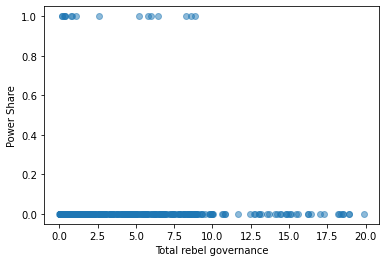

In [207]:
plt.scatter(clean_no_nan_data['TotRebGov']+np.random.rand(len(clean_no_nan_data)),
        clean_no_nan_data['DWALPOLPACT'], alpha=0.5)
plt.xlabel('Total rebel governance')
plt.ylabel('Power Share')

In [174]:
def get_year(row):
    return row.year

In [175]:
psed = pd.read_excel('../PSED_Excel.xlsx')
psed.rename(columns={'dyadID': 'DyadID', 'PostStartDate':'Year'}, inplace=True)
psed.Year = psed.Year.apply(get_year)

In [176]:
psed.head()

,pseddyID,paname,Year,paID,location,GWNo,region,conflictID,DyadID,SideA,...,mpsINC,epsINC,tpsINC,ppsPROM_IMP,mpsPROM_IMP,epsPROM_IMP,tpsPROM_IMP,_est_feature1,_est_feature2,_est_feature3
0,7001,Gbadolite Declaration on Angola,1989,54019890622,Angola,540,4,131,7,Government of Angola,...,0,0,0,0,0,0,0,1,1,1
1,7001,Gbadolite Declaration on Angola,1989,54019890622,Angola,540,4,131,7,Government of Angola,...,0,0,0,0,0,0,0,1,1,1
2,7001,Gbadolite Declaration on Angola,1989,54019890622,Angola,540,4,131,7,Government of Angola,...,0,0,0,0,0,0,0,1,1,1
3,7002,Bicesse Agreement,1991,54019910531,Angola,540,4,131,7,Government of Angola,...,0,0,0,0,0,0,0,1,1,1
4,7002,Bicesse Agreement,1991,54019910531,Angola,540,4,131,7,Government of Angola,...,0,0,0,0,0,0,0,1,1,1


In [177]:
len(psed.pseddyID.unique())

111

In [178]:
psed_grouped = psed.groupby('pseddyID')
first_occurance_psed_grouped = psed_grouped.first()
first_occurance_psed_grouped

,paname,Year,paID,location,GWNo,region,conflictID,DyadID,SideA,SideA_ID,...,mpsINC,epsINC,tpsINC,ppsPROM_IMP,mpsPROM_IMP,epsPROM_IMP,tpsPROM_IMP,_est_feature1,_est_feature2,_est_feature3
pseddyID,,,,,,,,,,,,,,,,,,,,,
7001,Gbadolite Declaration on Angola,1989,54019890622,Angola,540,4,131,7,Government of Angola,540,...,0,0,0,0,0,0,0,1,1,1
7002,Bicesse Agreement,1991,54019910531,Angola,540,4,131,7,Government of Angola,540,...,0,0,0,0,0,0,0,1,1,1
7003,Lusaka Protocol,1994,54019941120,Angola,540,4,131,7,Government of Angola,540,...,0,0,0,0,0,0,0,1,1,1
7004,Memorandum of Understanding,2002,54020020404,Angola,540,4,131,7,Government of Angola,540,...,1,0,0,0,1,0,0,1,1,1
11001,Arusha Peace and Reconciliation Agreement for ...,2000,51620000828,Burundi,516,4,90,11,Government of Burundi,516,...,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735001,Islamabad Accord,1993,70019930307,Afghanistan,700,3,137,735,Government of Afghanistan,700,...,0,0,0,0,0,0,0,1,1,1
735002,Jalalabad Agreement,1993,70019930520,Afghanistan,700,3,137,735,Government of Afghanistan,700,...,0,0,0,1,0,0,0,1,1,1
737001,Islamabad Accord,1993,70019930307,Afghanistan,700,3,137,737,Government of Afghanistan,700,...,0,0,0,0,0,0,0,1,1,1


In [179]:
unique_dyad_psed = psed.DyadID.unique()
print(unique_dyad_psed)
print(len(unique_dyad_psed))

[  7  11  12  13  14  15  21  22  24  25  26  27  35  36  37  38  40  41
  42  43  44  58  89  91  93  94  95  96  99 111 127 129 130 191 208 209
 211 216 220 223 225 228 230 242 245 247 251 259 262 281 292 293 295 303
 309 337 341 343 347 349 352 353 364 367 378 379 412 413 431 439 455 558
 631 641 645 731 732 733 735 737 761]
81


In [180]:
unique_dyad_rebgov = np.sort(rebgov.DyadID.unique())
print(unique_dyad_rebgov)
print(len(unique_dyad_rebgov))

[  1   3   4   7  11  12  13  14  15  22  26  36  37  38  39  40  42  43
  44  46  47  53  55  57  58  89  91  93  94  95  96  97  98  99 127 128
 129 130 131 148 151 152 153 189 190 191 207 208 209 210 211 212 216 217
 223 225 228 231 235 237 242 243 245 246 247 248 251 252 256 259 260 262
 269 272 279 285 286 292 293 295 296 298 303 304 305 306 307 308 309 313
 314 325 327 333 336 337 342 343 344 347 348 349 353 355 361 364 367 375
 378 379 380 381 387 405 411 412 413 422 428 433 434 439 442 443 448 451
 453 455 459 472 483 495 498 519 528 558 578 599 605 606 627 631 638 639
 641 643 647 648 656 667 670 694 697 711 721 724 731 732 733 735 737 747
 760 764 766 768 773 774 785]
169


In [181]:
len(set(unique_dyad_psed) & set(unique_dyad_rebgov))

66

In [182]:
rebgov_psed_merged = pd.merge(first_occurance_psed_grouped, rebgov, on=['DyadID','Year'], how='inner')

In [188]:
rebgov_psed_merged['total_power_sharing'] = rebgov_psed_merged['ppsPROM'] +\
rebgov_psed_merged['mpsPROM']+\
rebgov_psed_merged['epsPROM']+\
rebgov_psed_merged['tpsPROM']

In [190]:
def is_greater_than_one(data):
    if data > 0:
        return 1
    else:
        return 0

In [191]:
rebgov_psed_merged['any_pow_share'] = rebgov_psed_merged['total_power_sharing'].apply(is_greater_than_one)

Text(0, 0.5, 'Power Share')

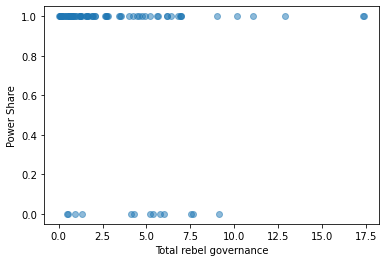

In [202]:
plt.scatter(rebgov_psed_merged['TotRebGov']+np.random.rand(len(rebgov_psed_merged)), 
            rebgov_psed_merged['any_pow_share'], alpha=0.5)
plt.xlabel('Total rebel governance')
plt.ylabel('Power Share')

Text(0, 0.5, 'Power Share')

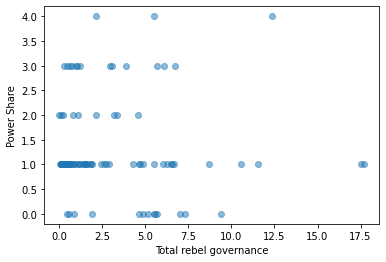

In [203]:
plt.scatter(rebgov_psed_merged['TotRebGov']+np.random.rand(len(rebgov_psed_merged)), 
            rebgov_psed_merged['total_power_sharing'], alpha=0.5)
plt.xlabel('Total rebel governance')
plt.ylabel('Power Share')

In [117]:
rebgov_psed_merged.to_excel('rebgov_psed_merged.xlsx')

In [277]:
fontana = pd.read_excel('FontanaUniqueDataset.xlsx')
fontana = fontana[~fontana.ConflictID.isna()]
fontana.ConflictID = fontana.ConflictID.astype(int)
fontana = fontana.loc[:, ~fontana.columns.str.contains('^Unnamed')]

In [278]:
fontana.head()

,AgreementID,AgreementNo,CountryName,AgreementName,Year,ConflictID,COWCode
0,Afg19920424,1,Afghanistan,Peshawar Accord,1992,137,700
1,Afg19930307,2,Afghanistan,Islamabad accord,1993,137,700
2,Afg20011205,3,Afghanistan,Agreement on Provisional Arrangements in Afgha...,2001,299,700
3,Alg19940129,4,Algeria,Decret Presidentiel Relatif a la Plate-Forme P...,1994,191,615
4,Alg19960919,5,Algeria,Décret présidentiel relatif à la plate-forme d...,1996,191,615


In [248]:
k = []
l = []
for i in range(0,len(fontana)-1):
    for r in range(0,len(fontana)):
        previous = (fontana.iloc[i]['ConflictID'], fontana.iloc[i]['Year'])
        next_ = (fontana.iloc[r]['ConflictID'], fontana.iloc[r]['Year'])
        if (previous == next_) & (i!=r):
            k.append(i)
            l.append(previous)
print(len(set(k)))

278


In [279]:
clean_fontana = fontana.drop(fontana.index[list(set(k))]).reset_index(drop=True)
print(len(clean_fontana))

92


In [280]:
# clean_fontana.to_excel('cleaned_excel.xlsx')

In [295]:
rebgov_fontana_merged = pd.merge(clean_fontana,
                                 rebgov, 
                                 on=['ConflictID','Year'], 
                                 how='inner')

In [296]:
rebgov_fontana_merged

,AgreementID,AgreementNo,CountryName,AgreementName,Year,ConflictID,COWCode,index,old_id,CName,...,PeaceA,Gov_in_Exile,LocalGov,NationalGov,PaperNatGov,Gov_Other,TotRebGov,SideB.1,SideA.1,Year.1
0,Afg19920424,1,Afghanistan,Peshawar Accord,1992,137,700,1810,1134.0,afghanistan,...,0.0,0.0,0.0,0.0,0,0,0,Jam'iyyat-i Islami-yi Afghanistan,Afghanistan,1992
1,Afg19920424,1,Afghanistan,Peshawar Accord,1992,137,700,1835,1135.0,afghanistan,...,0.0,0.0,0.0,0.0,0,0,0,Harakat-i Inqilab-i Islami-yi Afghanistan,Afghanistan,1992
2,Afg19920424,1,Afghanistan,Peshawar Accord,1992,137,700,1851,1136.0,afghanistan,...,0.0,0.0,0.0,0.0,0,0,0,Hizb-i Islami-yi Afghanistan - Khalis faction,Afghanistan,1992
3,Afg19920424,1,Afghanistan,Peshawar Accord,1992,137,700,1877,1137.0,afghanistan,...,0.0,0.0,0.0,0.0,0,0,0,Jabha-yi Nijat-i Milli-yi Afghanistan,Afghanistan,1992
4,Afg19920424,1,Afghanistan,Peshawar Accord,1992,137,700,1895,1138.0,afghanistan,...,0.0,0.0,0.0,0.0,0,0,1,Mahaz-i Milli-yi Islami-yi Afghanistan,Afghanistan,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Uga20021224,281,Uganda,Peace Agreement between the Government of the ...,2002,118,500,3393,1337.0,uganda,...,0.0,0.0,0.0,0.0,0,0,2,ADF,Uganda,2002
154,Uga20021224,281,Uganda,Peace Agreement between the Government of the ...,2002,118,500,3411,1338.0,uganda,...,0.0,0.0,0.0,0.0,0,0,0,WNBF,Uganda,2002
155,UK19980410,288,United Kingdom,The Good Friday Agreement,1998,119,200,1671,1124.0,united kingdom,...,1.0,0.0,0.0,0.0,0,0,5,PIRA,United Kingdom,1998
156,UK19980410,288,United Kingdom,The Good Friday Agreement,1998,119,200,1679,1125.0,united kingdom,...,0.0,0.0,0.0,0.0,0,0,0,RIRA,United Kingdom,1998


In [297]:
k = []
l = []
for i in range(0,len(rebgov_fontana_merged)-1):
    for r in range(0,len(rebgov_fontana_merged)):
        previous = (rebgov_fontana_merged.iloc[i]['ConflictID'], rebgov_fontana_merged.iloc[i]['Year'])
        next_ = (rebgov_fontana_merged.iloc[r]['ConflictID'], rebgov_fontana_merged.iloc[r]['Year'])
        if (previous == next_) & (i!=r):
            k.append(i)
            l.append(previous)
print(len(set(k)))

116


In [299]:
rebgov_fontana_merged

,AgreementID,AgreementNo,CountryName,AgreementName,Year,ConflictID,COWCode,index,old_id,CName,...,PeaceA,Gov_in_Exile,LocalGov,NationalGov,PaperNatGov,Gov_Other,TotRebGov,SideB.1,SideA.1,Year.1
0,Afg19920424,1,Afghanistan,Peshawar Accord,1992,137,700,1810,1134.0,afghanistan,...,0.0,0.0,0.0,0.0,0,0,0,Jam'iyyat-i Islami-yi Afghanistan,Afghanistan,1992
1,Afg19920424,1,Afghanistan,Peshawar Accord,1992,137,700,1835,1135.0,afghanistan,...,0.0,0.0,0.0,0.0,0,0,0,Harakat-i Inqilab-i Islami-yi Afghanistan,Afghanistan,1992
2,Afg19920424,1,Afghanistan,Peshawar Accord,1992,137,700,1851,1136.0,afghanistan,...,0.0,0.0,0.0,0.0,0,0,0,Hizb-i Islami-yi Afghanistan - Khalis faction,Afghanistan,1992
3,Afg19920424,1,Afghanistan,Peshawar Accord,1992,137,700,1877,1137.0,afghanistan,...,0.0,0.0,0.0,0.0,0,0,0,Jabha-yi Nijat-i Milli-yi Afghanistan,Afghanistan,1992
4,Afg19920424,1,Afghanistan,Peshawar Accord,1992,137,700,1895,1138.0,afghanistan,...,0.0,0.0,0.0,0.0,0,0,1,Mahaz-i Milli-yi Islami-yi Afghanistan,Afghanistan,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Uga20021224,281,Uganda,Peace Agreement between the Government of the ...,2002,118,500,3393,1337.0,uganda,...,0.0,0.0,0.0,0.0,0,0,2,ADF,Uganda,2002
154,Uga20021224,281,Uganda,Peace Agreement between the Government of the ...,2002,118,500,3411,1338.0,uganda,...,0.0,0.0,0.0,0.0,0,0,0,WNBF,Uganda,2002
155,UK19980410,288,United Kingdom,The Good Friday Agreement,1998,119,200,1671,1124.0,united kingdom,...,1.0,0.0,0.0,0.0,0,0,5,PIRA,United Kingdom,1998
156,UK19980410,288,United Kingdom,The Good Friday Agreement,1998,119,200,1679,1125.0,united kingdom,...,0.0,0.0,0.0,0.0,0,0,0,RIRA,United Kingdom,1998


In [75]:
ucdp = pd.read_excel('ucdp-peace-agreements-191.xlsx',
                     sheet_name='ModifiedbyBurak')
ucdp.rename(columns={'dyad_id':'DyadID', 'year':'Year'}, inplace=True)
ucdp = ucdp.assign(DyadID=ucdp['DyadID'].str.split(',')).explode('DyadID')
ucdp.DyadID = ucdp.DyadID.astype(int)

In [76]:
ucdp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 0 to 354
Data columns (total 59 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   conflict_id      404 non-null    object
 1   conflict_name    404 non-null    object
 2   DyadID           404 non-null    int64 
 3   dyad_name        404 non-null    object
 4   actor_name       404 non-null    object
 5   pa_name          404 non-null    object
 6   Year             404 non-null    int64 
 7   pa_comment       404 non-null    object
 8   c_sign           387 non-null    object
 9   pa_3rd           287 non-null    object
 10  c_3rd            254 non-null    object
 11  ended            404 non-null    bool  
 12  cease            404 non-null    int64 
 13  intarmy          404 non-null    int64 
 14  ddr              404 non-null    int64 
 15  withd            404 non-null    int64 
 16  mil prov         404 non-null    int64 
 17  pp               404 non-null    in

In [77]:
ucdp.head()

,conflict_id,conflict_name,DyadID,dyad_name,actor_name,pa_name,Year,pa_comment,c_sign,pa_3rd,...,co impl,active_conflict,termdur,txt,inclusive,no dyad,pa type,out_iss,procID,frame
0,333,Afghanistan: Government,729,Government of Afghanistan - Mahaz-i Milli-yi I...,"Government of Afghanistan, Mahaz-i Milli-yi Is...",Peshawar Accord,1992,Partial Peace Agreement \n\nThis agreement set...,"Dyadic peace agreement signed in Peshawar, Pak...",NaN,...,0,1,-99,1,2,6,2,2,105,1
0,333,Afghanistan: Government,726,Government of Afghanistan - Mahaz-i Milli-yi I...,"Government of Afghanistan, Mahaz-i Milli-yi Is...",Peshawar Accord,1992,Partial Peace Agreement \n\nThis agreement set...,"Dyadic peace agreement signed in Peshawar, Pak...",NaN,...,0,1,-99,1,2,6,2,2,105,1
0,333,Afghanistan: Government,727,Government of Afghanistan - Mahaz-i Milli-yi I...,"Government of Afghanistan, Mahaz-i Milli-yi Is...",Peshawar Accord,1992,Partial Peace Agreement \n\nThis agreement set...,"Dyadic peace agreement signed in Peshawar, Pak...",NaN,...,0,1,-99,1,2,6,2,2,105,1
0,333,Afghanistan: Government,725,Government of Afghanistan - Mahaz-i Milli-yi I...,"Government of Afghanistan, Mahaz-i Milli-yi Is...",Peshawar Accord,1992,Partial Peace Agreement \n\nThis agreement set...,"Dyadic peace agreement signed in Peshawar, Pak...",NaN,...,0,1,-99,1,2,6,2,2,105,1
0,333,Afghanistan: Government,730,Government of Afghanistan - Mahaz-i Milli-yi I...,"Government of Afghanistan, Mahaz-i Milli-yi Is...",Peshawar Accord,1992,Partial Peace Agreement \n\nThis agreement set...,"Dyadic peace agreement signed in Peshawar, Pak...",NaN,...,0,1,-99,1,2,6,2,2,105,1


In [78]:
rebgov_ucdp_merged = pd.merge(ucdp, rebgov, on=['DyadID','Year'], how='inner')

In [81]:
rebgov_ucdp_merged.to_excel('rebgov_ucdp_merged.xlsx')

In [5]:
hartzel = pd.read_excel('data/Hartzell&Hoddie_2020DatasetExcell.xlsx')
hartzel.rename(columns={'year':'Year', 'ccodecow':'CCD'}, inplace=True)
hartzel.cname = hartzel.cname.str.lower()
hartzel.head()

,ten_years,tsls2,tsls3,tsls,ccode,CCD,pwt_gsg,chga_demo,laglogpwt_rgdpch,highps,...,terrps,lji_region_year,british_colonialism,log_wdi_pop,Year,atwar,lji,y1999,socialist_legcode,cname
0,NaN,NaN,NaN,NaN,4,700,NaN,0. Dictatorship,NaN,NaN,...,NaN,NaN,0,NaN,1946,0.0,NaN,1,0,afghanistan
1,NaN,NaN,NaN,NaN,4,700,NaN,0. Dictatorship,NaN,NaN,...,NaN,NaN,0,NaN,1947,0.0,NaN,1,0,afghanistan
2,NaN,NaN,NaN,NaN,4,700,NaN,0. Dictatorship,NaN,NaN,...,NaN,0.278083,0,NaN,1948,0.0,0.0186,1,0,afghanistan
3,NaN,NaN,NaN,NaN,4,700,NaN,0. Dictatorship,NaN,NaN,...,NaN,0.284267,0,NaN,1949,0.0,0.0182,1,0,afghanistan
4,NaN,NaN,NaN,NaN,4,700,NaN,0. Dictatorship,NaN,NaN,...,NaN,0.289783,0,NaN,1950,0.0,0.0179,1,0,afghanistan


In [6]:
hartzel.columns

Index(['ten_years', 'tsls2', 'tsls3', 'tsls', 'ccode', 'CCD', 'pwt_gsg',
       'chga_demo', 'laglogpwt_rgdpch', 'highps', 'lnwardur', 'numps',
       'newonsetdemulf', 'pko', 'mediation', 'prevcivwar', 'prevdem', 'pcw',
       'rrs', 'negsett', 'milvictory', 'polps', 'milps', 'econps', 'terrps',
       'lji_region_year', 'british_colonialism', 'log_wdi_pop', 'Year',
       'atwar', 'lji', 'y1999', 'socialist_legcode', 'cname'],
      dtype='object')

In [45]:
hartzel_rebgov_removed_dups_merged = pd.merge(hartzel, rebgov_droped_dups, on=["CCD", "Year"])

In [47]:
hartzel_rebgov_removed_dups_merged.to_excel('hartzel_rebgov_removed_dups_merged.xlsx')

In [52]:
hartzel_rebgov_merged = pd.merge(hartzel, rebgov, on=["CCD", "Year"])

`numps` 0 olanlarin hepsi alindi ve 1'den buyuk olanlar filtrelendi.

In [56]:
add_afterwards = hartzel_rebgov_merged[hartzel_rebgov_merged.numps < 1].reset_index(drop=True)

In [57]:
before_filter_hartzel = hartzel_rebgov_merged[hartzel_rebgov_merged.numps > 0].reset_index(drop=True)

In [58]:
after_filter_hartzel = before_filter_hartzel.drop_duplicates(subset=['Year', 'CName'], 
                                      keep=False
                                     ).reset_index(drop=True)

In [61]:
half_cleaned_hartzel = pd.concat([after_filter_hartzel, add_afterwards], ignore_index=True)

In [66]:
# clean_half_cleaned_hartzel = half_cleaned_hartzel.dropna(subset=['rebstrengthUCDP'])


In [63]:
half_cleaned_hartzel.to_excel('half_cleaned_hartzel.xlsx')

In [164]:
hartzel_rebgov_merged_no_burundi = hartzel_rebgov_merged[(hartzel_rebgov_merged.CName != 'burundi') & 
                      (hartzel_rebgov_merged['SideA.1'] != 'burundi') & 
                      (hartzel_rebgov_merged['cname'] != 'burundi')]

In [162]:
len(hartzel_rebgov_merged)

4752

In [163]:
hartzel_rebgov_merged.to_excel('data/hartzel_rebgov_merged.xlsx')

In [165]:
hartzel_rebgov_merged_no_burundi.to_excel('data/hartzel_rebgov_merged_no_burundi.xlsx')

In [147]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats

In [148]:
reg = smf.logit(formula = 'polps ~ TotRebGov', data=hartzel_rebgov_merged_no_burundi, missing='drop').fit()
reg.summary()

Optimization terminated successfully.
         Current function value: 0.645055
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  polps   No. Observations:                 1446
Model:                          Logit   Df Residuals:                     1444
Method:                           MLE   Df Model:                            1
Date:                Thu, 09 Sep 2021   Pseudo R-squ.:                 0.01002
Time:                        21:02:58   Log-Likelihood:                -932.75
converged:                       True   LL-Null:                       -942.19
Covariance Type:            nonrobust   LLR p-value:                 1.394e-05
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4154      0.067     -6.156      0.000      -0.548      -0.283
TotRebGov     -0.0512      0.012     -4.178      0.000      -0.075      -0.027
==============================================================================
"""